# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** ARIMA vs Prophet

</font>
</div>

# Import modules
<hr style = "border:2px solid black" ></hr>

In [23]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Read the dataset
<hr style = "border:2px solid black" ></hr>

In [7]:
df = pd.read_csv('./monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly_Prod
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [8]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly_Prod
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


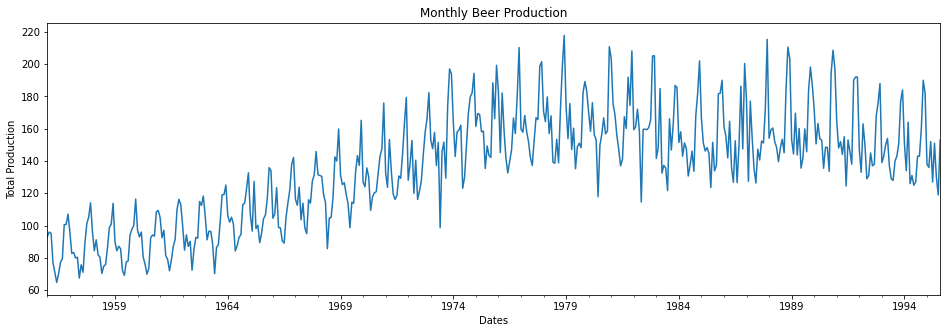

In [9]:
# Basic Data Plot
df.index.freq = 'MS'
ax = df['Monthly_Prod'].plot(figsize=(16, 5), title="Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production')

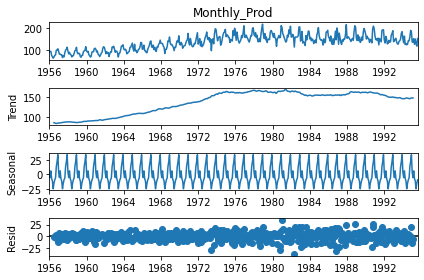

In [10]:
#Seasonal Decompose Plots
a = seasonal_decompose(df["Monthly_Prod"], model = "add")
a.plot();

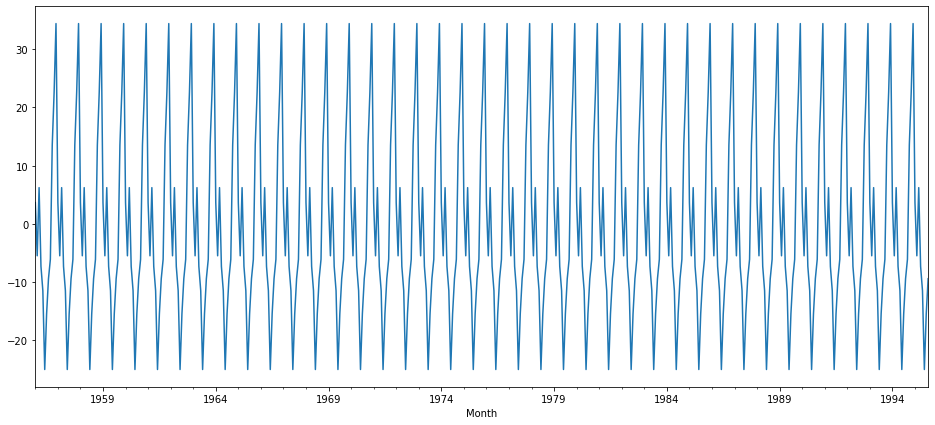

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# ARIMA
<hr style = "border:2px solid black" ></hr>

In [12]:
# Finding the best values for p,q,d,P,Q,D
auto_arima(df['Monthly_Prod'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1723.889
Date:                              Fri, 01 Apr 2022   AIC                           3471.777
Time:                                      11:17:10   BIC                           3521.737
Sample:                                           0   HQIC                          3491.424
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2223      0.056     -3.958      0.000      -0.332      -0.112
ar.L2         -0.1021      0.061     -1.679      0.093      -0.221       0.017
ar.L3          0.7278      0.059     12.298      0.000       0.612       0.844
ar.L4         -0.1612      0.049     -3.258      0.001      -0.258      -0.064
ar.L5          0.0109      0.049      0.222      0.825      -0.086       0.107
ma.L1         -0.7378      0.037    -20.006      0.000      -0.810      -0.666
ma.L2         -0.1701      0.025     -6.797      0.000      -0.219      -0.121
ma.L3         -0.7998      0.024    -33.593      0.000      -0.846      -0.753
ma.L4          0.8551      0.033     26.273      0.000       0.791       0.919
ar.S.L12       0.9946      0.005    220.610      0.000       0.986       1.003
ma.S.L12      -0.8191      0.037    -22.002      0.000      -0.892      -0.746
sigma2        79.3355      4.333     18.310      0.000      70.843      87.828
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                67.52
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Train-Test split
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Monthly_Prod'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1708.023
Date:                                    Fri, 01 Apr 2022   AIC                           3438.045
Time:                                            11:17:19   BIC                           3483.560
Sample:                                        01-01-1956   HQIC                          3455.963
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1221      0.043     -2.871      0.004      -0.205      -0.039
ar.L2         -0.1699      0.045     -3.753      0.000      -0.259      -0.081
ma.L1         -0.8456      0.028    -30.652      0.000      -0.900      -0.792
ar.S.L12       1.7581      0.113     15.579      0.000       1.537       1.979
ar.S.L24      -1.6112      0.216     -7.460      0.000      -2.035      -1.188
ar.S.L36       0.7897      0.165      4.776      0.000       0.466       1.114
ar.S.L48       0.0621      0.057      1.090      0.276      -0.050       0.174
ma.S.L12      -1.5559      0.127    -12.273      0.000      -1.804      -1.307
ma.S.L24       1.3854      0.211      6.560      0.000       0.971       1.799
ma.S.L36      -0.6556      0.121     -5.396      0.000      -0.894      -0.418
sigma2        84.2646      4.931     17.090      0.000      74.601      93.928
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                41.03
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
#Prediction
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.077512
1994-10-01    157.801862
1994-11-01    181.709153
1994-12-01    183.568855
1995-01-01    145.037589
1995-02-01    136.892762
1995-03-01    151.261783
1995-04-01    133.203561
1995-05-01    137.840514
1995-06-01    120.632496
1995-07-01    128.492514
1995-08-01    138.858918
Freq: MS, Name: ARIMA Predictions, dtype: float64

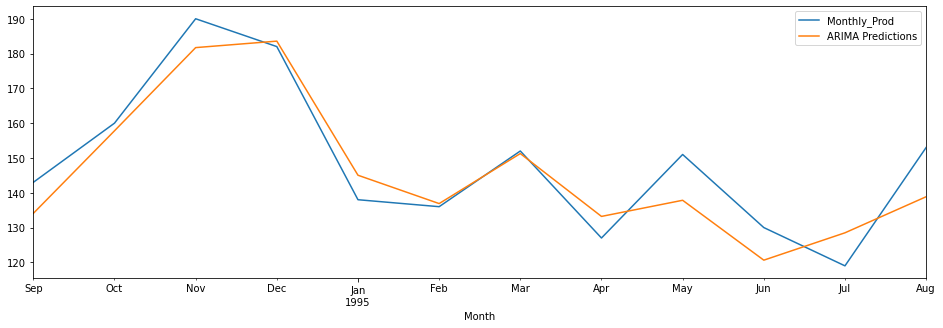

In [15]:
test_data['Monthly_Prod'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [16]:
#Model Evaluation
arima_rmse_error = rmse(test_data['Monthly_Prod'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 66.33300935537757
RMSE Error: 8.144507925920237
Mean: 136.39537815126045


In [17]:
test_data['ARIMA_Predictions'] = arima_pred

# Prophet
<hr style = "border:2px solid black" ></hr>

In [19]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [20]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.165860,130.773041,155.995616,151.107236,151.219284,-7.984091,-7.984091,-7.984091,-7.984091,-7.984091,-7.984091,0.0,0.0,0.0,143.181770
472,1995-05-01,151.102913,127.165971,152.237961,151.028194,151.172043,-11.386819,-11.386819,-11.386819,-11.386819,-11.386819,-11.386819,0.0,0.0,0.0,139.716094
473,1995-06-01,151.037867,113.738567,139.586405,150.930142,151.135119,-23.869618,-23.869618,-23.869618,-23.869618,-23.869618,-23.869618,0.0,0.0,0.0,127.168249
474,1995-07-01,150.974920,122.318785,148.742355,150.837512,151.092425,-15.751071,-15.751071,-15.751071,-15.751071,-15.751071,-15.751071,0.0,0.0,0.0,135.223849
475,1995-08-01,150.909874,129.711601,154.435256,150.752318,151.056184,-9.190193,-9.190193,-9.190193,-9.190193,-9.190193,-9.190193,0.0,0.0,0.0,141.719682


In [21]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,145.089218
1994-10-01,166.162072
1994-11-01,173.752204
1994-12-01,186.006822
1995-01-01,155.276243
1995-02-01,146.861337
1995-03-01,158.996224
1995-04-01,143.181770
1995-05-01,139.716094


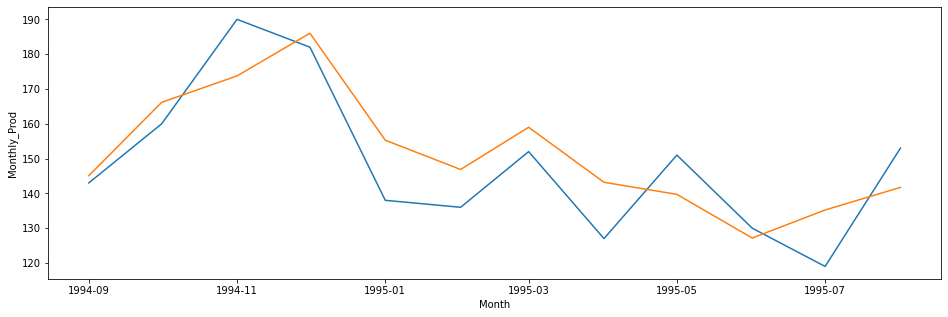

In [24]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_Prod"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [25]:
prophet_rmse_error = rmse(test_data['Monthly_Prod'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.28497574796367
RMSE Error: 11.457965602495221
Mean: 136.39537815126045


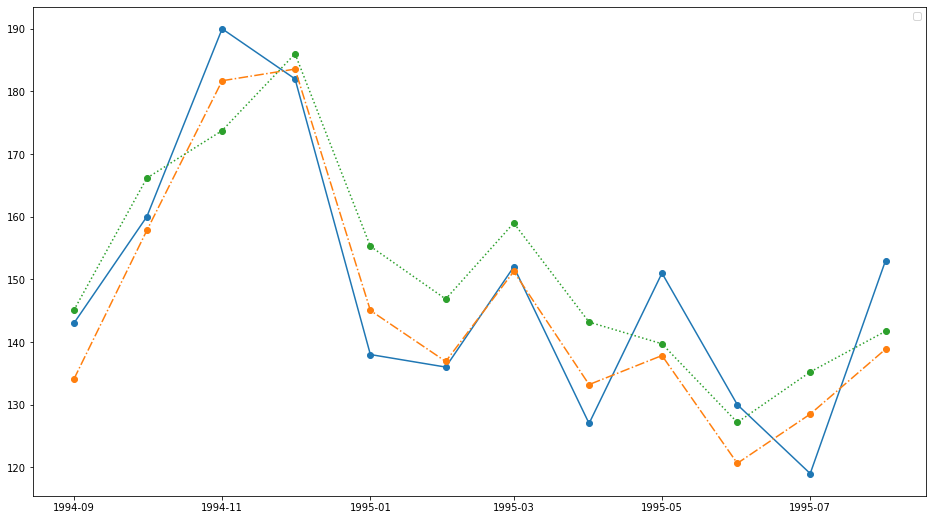

In [26]:
#Comparison

rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_Prod"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [27]:
print(f"Mean: {test_data['Monthly_Prod'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.144508,66.333009
1,Prophet,11.457966,131.284976


In [28]:
#Final Prediction data
test_data

,Monthly_Prod,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,134.077512,145.089218
1994-10-01,160.0,157.801862,166.162072
1994-11-01,190.0,181.709153,173.752204
1994-12-01,182.0,183.568855,186.006822
1995-01-01,138.0,145.037589,155.276243
1995-02-01,136.0,136.892762,146.861337
1995-03-01,152.0,151.261783,158.996224
1995-04-01,127.0,133.203561,143.181770
1995-05-01,151.0,137.840514,139.716094


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- [GitHub code](https://github.com/krishvictor77/Time-Series-Forecasting-ARIMA-vs-Prophet/blob/master/ARIMA%20vs%20Prophet.ipynb)
- [Blog article](https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a)

</font>
</div>